In [35]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams.update({'font.size':16})

Load in all the data and split test and train.

In [5]:
dataDir = 'data/'
trainDir = 'train/'
train = pd.read_csv(dataDir+'creditcard.csv').values
X_train, X_test, y_train, y_test = train_test_split(train[:,:29],train[:,30])

This function does a resample and train for the given sampler. It assumes that the sampler follows imblearn's conventions.

In [33]:
def resample_and_train(X_train_unsampled,y_train_unsampled,X_test,y_test,metrics=[f1_score],metricNames=['F1'],sampler=None,ks=range(1,16),weightss=['distance','uniform'],verbose=True,n_jobs=-1):
    xtr = None
    ytr = None
    if sampler is None:
        xtr = X_train_unsampled
        ytr = y_train_unsampled
    else:
        xtr, ytr = sampler().fit_resample(X_train,y_train)
    
    results = np.array([np.array([np.array([0.,0.]) for k in ks]) for metric in metrics])
    i = 0
    for k in ks:
        j = 0
        for weights in weightss:
            if verbose:
                print(k,weights,end='\t')#sanity check
            knn = KNeighborsClassifier(n_neighbors=k,weights=weights,n_jobs=n_jobs)
            knn.fit(xtr,ytr)
            ypr = knn.predict(X_test)
            ii = 0
            for m in range(len(metrics)):
                mtv = metrics[m](ypr,y_test)
                results[ii][i][j] = mtv
                ii+=1
                if verbose:
                    print(metricNames[m] + ": {:.3f}".format(mtv),end='\t')
            if verbose:
                print()
            j+=1
        i+=1
    return results

This will plot the results given by `resample_and_train()`.

In [34]:
def plot_results(results,testname,metrics=['F1'],show_best = True):
    plt.figure(1,figsize=(20,10))
    
    if show_best:
        best_by_metric = [{
            "metric":metric,
            "scores":[-float("inf") for i in range(len(metrics))],
            "k":0,
            "weights":None
        } for metric in metrics]
        for m in range(len(metrics)):
            for k in range(len(results[m])):
                if np.max(results[m][k]) >= best_by_metric[m]["scores"][m]:#>= so we default to the highest value of k
                    #this is the best one by this metric
                    if results[m][k][0] > results[m][k][1]:
                        #if weighted was better
                        best_by_metric[m].update({'scores':[results[i][k][0] for i in range(len(metrics))],
                                                 'k':k+1,
                                                 'weights':'weighted'})
                    else:
                        best_by_metric[m].update({'scores':[results[i][k][1] for i in range(len(metrics))],
                                                 'k':k+1,
                                                 'weights':'unweighted'})
        for best in best_by_metric:
            print("Best using " + best['metric'] + ": k = " + str(best['k']) + ", " + best['weights'])
            for m in range(len(metrics)):
                print(metrics[m] + ": {:.3f}".format(best['scores'][m]))
            print()


    for m in range(len(results)):
        plt.plot(range(1,len(results[0])+1),results[m][:,0], label = metrics[m] + " for weighted")
        plt.plot(range(1,len(results[0])+1),results[m][:,1], label = metrics[m] + " for unweighted")

    # for model_name, data in roc_auc_dict.items():
    #     plt.plot(data['fpr'], data['tpr'], label='{} (area = {:.3f})'.format(model_name, data['auc']))

    plt.xlabel('k')
    plt.ylabel('Metric')
    plt.title('Metrics for ' + testname)
    plt.legend(loc='best')
    plt.show()

1 distance	F1: 0.005	Precision: 0.652	Recall: 0.003	
1 uniform	F1: 0.005	Precision: 0.652	Recall: 0.003	
2 distance	F1: 0.005	Precision: 0.652	Recall: 0.003	
2 uniform	F1: 0.007	Precision: 0.411	Recall: 0.003	
3 distance	F1: 0.005	Precision: 0.643	Recall: 0.003	
3 uniform	F1: 0.005	Precision: 0.589	Recall: 0.003	
4 distance	F1: 0.005	Precision: 0.643	Recall: 0.003	
4 uniform	F1: 0.007	Precision: 0.464	Recall: 0.003	
5 distance	F1: 0.006	Precision: 0.643	Recall: 0.003	
5 uniform	F1: 0.006	Precision: 0.580	Recall: 0.003	
6 distance	F1: 0.005	Precision: 0.625	Recall: 0.003	
6 uniform	F1: 0.006	Precision: 0.438	Recall: 0.003	
7 distance	F1: 0.006	Precision: 0.634	Recall: 0.003	
7 uniform	F1: 0.005	Precision: 0.545	Recall: 0.003	
8 distance	F1: 0.005	Precision: 0.625	Recall: 0.003	
8 uniform	F1: 0.006	Precision: 0.464	Recall: 0.003	
9 distance	F1: 0.005	Precision: 0.625	Recall: 0.003	
9 uniform	F1: 0.005	Precision: 0.554	Recall: 0.003	
10 distance	F1: 0.005	Precision: 0.607	Recall: 0.003	
1

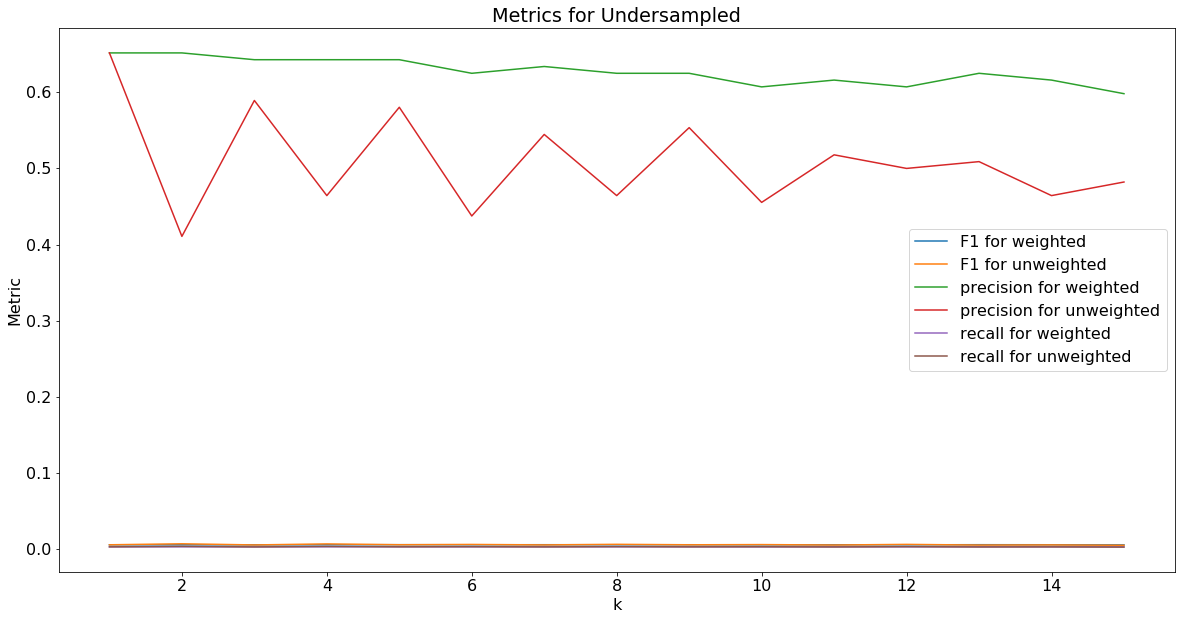

In [36]:
undersampled = resample_and_train(X_train,y_train,X_test,y_test,metrics=[f1_score,precision_score,recall_score],metricNames=['F1','Precision','Recall'],sampler=RandomUnderSampler)
plot_results(undersampled,'Undersampled',metrics=['F1','precision','recall'])

1 distance	F1: 0.159	Precision: 0.768	Recall: 0.089	
1 uniform	F1: 0.159	Precision: 0.768	Recall: 0.089	
2 distance	F1: 0.159	Precision: 0.768	Recall: 0.089	
2 uniform	F1: 0.248	Precision: 0.768	Recall: 0.148	
3 distance	F1: 0.140	Precision: 0.768	Recall: 0.077	
3 uniform	F1: 0.139	Precision: 0.768	Recall: 0.076	
4 distance	F1: 0.151	Precision: 0.768	Recall: 0.084	
4 uniform	F1: 0.183	Precision: 0.750	Recall: 0.104	
5 distance	F1: 0.128	Precision: 0.759	Recall: 0.070	
5 uniform	F1: 0.123	Precision: 0.750	Recall: 0.067	
6 distance	F1: 0.136	Precision: 0.750	Recall: 0.075	
6 uniform	F1: 0.154	Precision: 0.732	Recall: 0.086	
7 distance	F1: 0.121	Precision: 0.750	Recall: 0.066	
7 uniform	F1: 0.113	Precision: 0.741	Recall: 0.061	
8 distance	F1: 0.129	Precision: 0.741	Recall: 0.071	
8 uniform	F1: 0.140	Precision: 0.714	Recall: 0.077	
9 distance	F1: 0.118	Precision: 0.732	Recall: 0.064	
9 uniform	F1: 0.106	Precision: 0.714	Recall: 0.057	
10 distance	F1: 0.122	Precision: 0.723	Recall: 0.066	
1

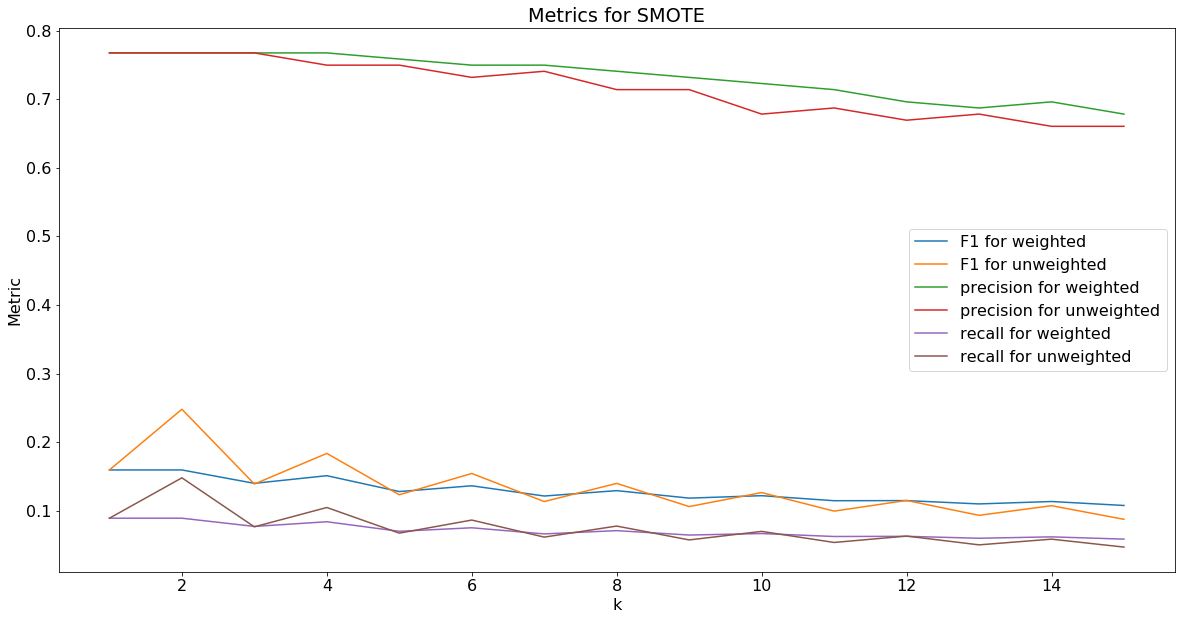

In [37]:
SMOTE_oversampled = resample_and_train(X_train,y_train,X_test,y_test,metrics=[f1_score,precision_score,recall_score],metricNames=['F1','Precision','Recall'],sampler=SMOTE)
plot_results(SMOTE_oversampled,'SMOTE',metrics=['F1','precision','recall'])

1 distance	F1: 0.387	Precision: 0.259	Recall: 0.763	
1 uniform	F1: 0.387	Precision: 0.259	Recall: 0.763	
2 distance	F1: 0.387	Precision: 0.259	Recall: 0.763	
2 uniform	F1: 0.387	Precision: 0.259	Recall: 0.763	
3 distance	F1: 0.374	Precision: 0.259	Recall: 0.674	
3 uniform	F1: 0.369	Precision: 0.259	Recall: 0.644	
4 distance	F1: 0.372	Precision: 0.259	Recall: 0.659	
4 uniform	F1: 0.369	Precision: 0.259	Recall: 0.644	
5 distance	F1: 0.347	Precision: 0.259	Recall: 0.527	
5 uniform	F1: 0.337	Precision: 0.259	Recall: 0.483	
6 distance	F1: 0.343	Precision: 0.259	Recall: 0.509	
6 uniform	F1: 0.337	Precision: 0.259	Recall: 0.483	
7 distance	F1: 0.330	Precision: 0.259	Recall: 0.453	
7 uniform	F1: 0.314	Precision: 0.259	Recall: 0.397	
8 distance	F1: 0.326	Precision: 0.259	Recall: 0.439	
8 uniform	F1: 0.314	Precision: 0.259	Recall: 0.397	
9 distance	F1: 0.310	Precision: 0.259	Recall: 0.387	
9 uniform	F1: 0.289	Precision: 0.259	Recall: 0.326	
10 distance	F1: 0.301	Precision: 0.259	Recall: 0.358	
1

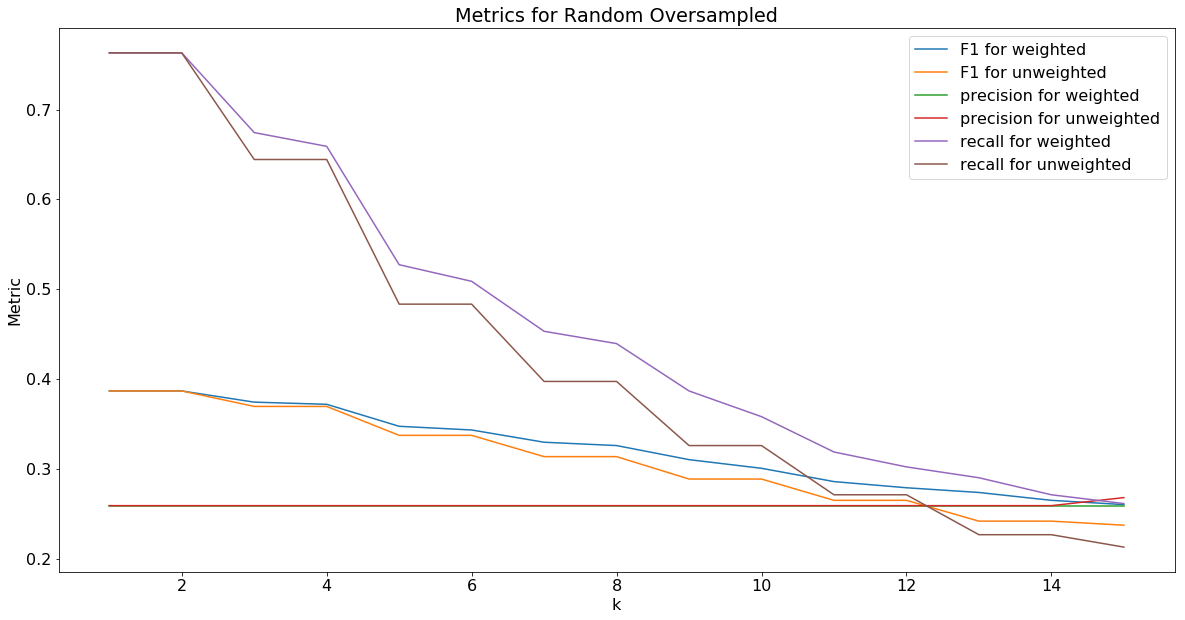

In [38]:
random_oversampled = resample_and_train(X_train,y_train,X_test,y_test,metrics=[f1_score,precision_score,recall_score],metricNames=['F1','Precision','Recall'],sampler=RandomOverSampler)
plot_results(random_oversampled,'Random Oversampled',metrics=['F1','precision','recall'])

1 distance	F1: 0.387	Precision: 0.259	Recall: 0.763	
1 uniform	F1: 0.387	Precision: 0.259	Recall: 0.763	
2 distance	F1: 0.387	Precision: 0.259	Recall: 0.763	
2 uniform	F1: 0.275	Precision: 0.161	Recall: 0.947	
3 distance	F1: 0.362	Precision: 0.223	Recall: 0.962	
3 uniform	F1: 0.275	Precision: 0.161	Recall: 0.947	
4 distance	F1: 0.326	Precision: 0.196	Recall: 0.957	
4 uniform	F1: 0.194	Precision: 0.107	Recall: 1.000	
5 distance	F1: 0.288	Precision: 0.170	Recall: 0.950	
5 uniform	F1: 0.194	Precision: 0.107	Recall: 1.000	
6 distance	F1: 0.277	Precision: 0.161	Recall: 1.000	
6 uniform	F1: 0.194	Precision: 0.107	Recall: 1.000	
7 distance	F1: 0.250	Precision: 0.143	Recall: 1.000	
7 uniform	F1: 0.194	Precision: 0.107	Recall: 1.000	
8 distance	F1: 0.250	Precision: 0.143	Recall: 1.000	
8 uniform	F1: 0.164	Precision: 0.089	Recall: 1.000	
9 distance	F1: 0.250	Precision: 0.143	Recall: 1.000	
9 uniform	F1: 0.164	Precision: 0.089	Recall: 1.000	
10 distance	F1: 0.236	Precision: 0.134	Recall: 1.000	
1

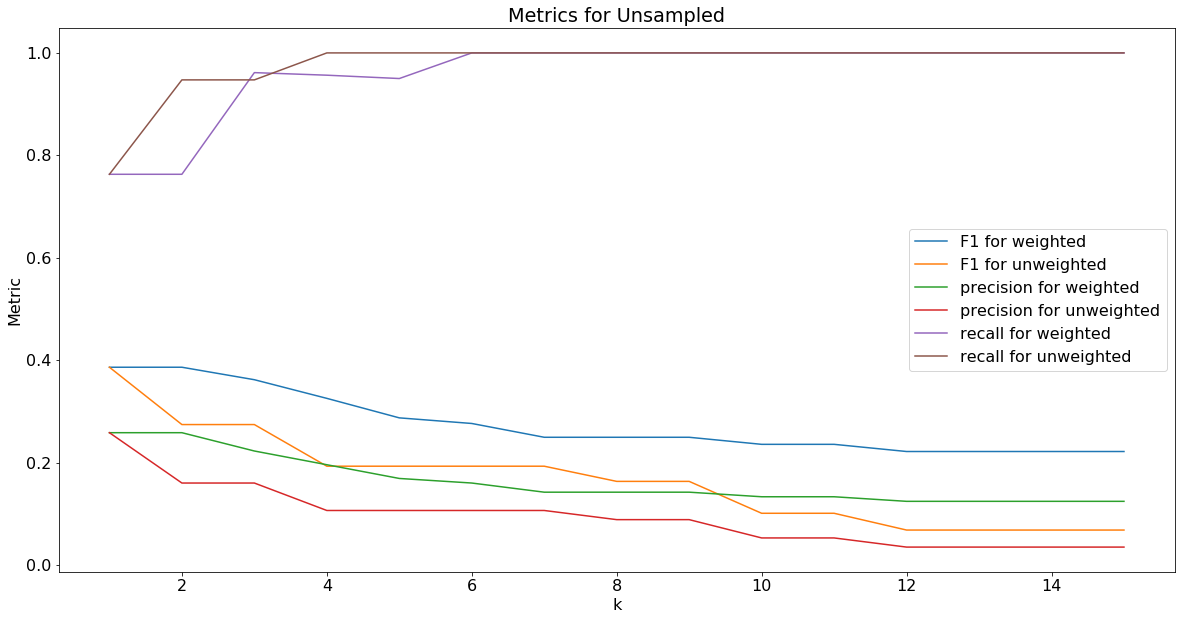

In [39]:
unsampled = resample_and_train(X_train,y_train,X_test,y_test,metrics=[f1_score,precision_score,recall_score],metricNames=['F1','Precision','Recall'])
plot_results(unsampled,'Unsampled',metrics=['F1','precision','recall'])